<h1>Capstone Project </h1>

Here I am trying to work with data related to cancer cell characterstics. Data is sourced from practice dataset available on kaggle.
Goal will be to understand growth of cancerogenic cells.

Dataset has record of extended characterstics of cancer cells. I will be preparing the data and creating the model.

<h2>Importing libraries and loading data </h2>

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import types
from botocore.client import Config
import ibm_boto3
%matplotlib inline
def __iter__(self): return 0


client_c91689b6daa14a5c84b6ddb084b23647 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='xFDTOU4F9INeV3_nOoI7BPhahkBsJLgQRtf3eMD9DOG2',
    ibm_auth_endpoint="https://iam.eu-gb.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_c91689b6daa14a5c84b6ddb084b23647.get_object(Bucket='acs-donotdelete-pr-mtqyxthnk0vipb',Key='cancer-cell-data.csv')['Body']
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )
data = pd.read_csv(body)
data.head(3)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,65768,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,78393,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,45414,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


<h1> Data Wrangling </h1>

Examining data for missing / invalid values and corelated / duplicate parameters.

In [132]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1144 entries, 0 to 1143
Data columns (total 32 columns):
id                         1144 non-null int64
diagnosis                  1144 non-null object
radius_mean                1144 non-null float64
texture_mean               1144 non-null float64
perimeter_mean             1144 non-null float64
area_mean                  1144 non-null float64
smoothness_mean            1144 non-null float64
compactness_mean           1144 non-null float64
concavity_mean             1144 non-null float64
concave points_mean        1144 non-null float64
symmetry_mean              1144 non-null float64
fractal_dimension_mean     1144 non-null float64
radius_se                  1144 non-null float64
texture_se                 1144 non-null float64
perimeter_se               1144 non-null float64
area_se                    1144 non-null float64
smoothness_se              1144 non-null float64
compactness_se             1144 non-null float64
concavity_se  

We can see all 1144 records have all set of values available.
Lets assign lable and features, while droping non-required columns.

In [183]:

lab = data.diagnosis
nd = data.drop(['id','diagnosis'],axis = 1 )
nd.head(2)


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


Here one can see that characterstic values are registered mainly aside three data properties - mean,sd and worst.
Lets segregate the relevant colums.

In [149]:

mean_cols = [col for col in nd.columns if '_mean' in col]
se_cols = [col for col in nd.columns if '_se' in col]
worst_cols = [col for col in nd.columns if '_worst' in col]
print(mean_cols,'\n')
print(se_cols,'\n')
print(worst_cols)

['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean'] 

['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se'] 

['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


Before moving forward to the data analysis of features. Lets have a quick look of the labels we are going to predict

Benign Cell:  725
Malignant Cell:  419


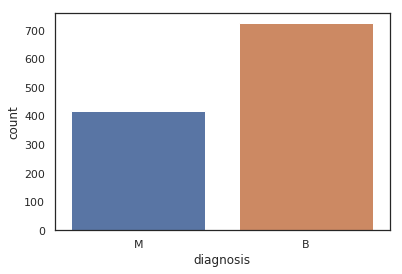

In [189]:
ax = sns.countplot(lab,label="Count")
B,M = lab.value_counts()
print('Benign Cell: ',B)
print('Malignant Cell: ',M)

Lets examin the data distribution with possible statistical values to understand if distribution is normal or skewed on any part.

In [85]:
nd.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,1144.000000,1144.000000,1144.000000,1144.000000,1144.000000,1144.000000,1144.000000,1144.000000,1144.000000,1144.000000,...,1144.000000,1144.000000,1144.000000,1144.000000,1144.000000,1144.000000,1144.000000,1144.000000,1144.000000,1144.000000
mean,14.011965,19.102308,91.250586,642.681469,0.096742,0.105654,0.089045,0.048815,0.181899,0.063219,...,16.123667,25.511757,106.393558,862.516608,0.132692,0.258948,0.275187,0.114948,0.291853,0.084990
std,3.435207,4.168393,23.717033,338.714296,0.014547,0.054235,0.080419,0.038734,0.027798,0.007333,...,4.702447,5.962434,32.835206,548.464527,0.023486,0.164976,0.213210,0.065917,0.064025,0.019539
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.680000,16.070000,75.170000,418.700000,0.085867,0.066018,0.029560,0.020310,0.162000,0.058080,...,13.025000,20.950000,84.147500,514.000000,0.116075,0.151525,0.116800,0.065125,0.250575,0.072110
50%,13.210000,18.750000,85.790000,538.700000,0.096620,0.093125,0.061540,0.033260,0.179900,0.061670,...,14.845000,25.340000,97.140000,675.200000,0.131300,0.211850,0.228200,0.099425,0.281900,0.080320
75%,15.730000,21.590000,102.975000,762.925000,0.106025,0.130500,0.127725,0.074000,0.196700,0.066590,...,18.255000,29.410000,123.800000,1030.250000,0.146150,0.339100,0.379925,0.162500,0.319600,0.092510
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


From above result it is clear that normalization should be done before visualization and classificaiton.
Lets create sameple.

In [151]:
def sampler(s, n=None):
    if isinstance(s, pd.Series):
        s = s.copy()
        s.index = range(len(s.index))
    if n == None:
        n = len(s)
        
    sample_temp = np.floor(np.random.rand(n)*len(s)).astype(int)
    sample = np.array(s[sample_temp])
    return sample

sampled = pd.DataFrame(index=nd.index, columns=nd.columns)
for col in nd.columns:
    sampled[col] = sampler(nd[col])

sampled.iloc[:50,:50]

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,13.170,19.51,82.61,1319.0,0.10440,0.07210,0.007510,0.030990,0.1675,0.06066,...,12.820,20.61,64.01,739.3,0.11760,0.23180,0.185600,0.06384,0.2827,0.08832
1,20.160,17.18,55.27,1265.0,0.09462,0.13280,0.146600,0.106200,0.1746,0.06422,...,8.678,19.25,63.30,390.4,0.14600,0.86810,0.090760,0.11290,0.3142,0.05871
2,15.060,19.63,85.79,441.0,0.09723,0.17650,0.040570,0.023220,0.1812,0.06869,...,22.390,20.98,155.00,758.2,0.15620,0.40610,0.145900,0.05601,0.3020,0.06643
3,14.610,13.43,89.78,1407.0,0.11550,0.12800,0.051920,0.005664,0.1685,0.06048,...,24.990,26.36,153.20,361.2,0.12070,0.17930,0.211400,0.05556,0.2407,0.07230
4,11.250,24.59,129.70,241.0,0.09579,0.10180,0.157200,0.099610,0.2275,0.07292,...,16.410,19.26,85.56,767.3,0.13850,0.15810,0.481900,0.13570,0.4089,0.09772
5,14.400,29.37,94.48,464.5,0.08352,0.15150,0.000000,0.016150,0.1550,0.06432,...,25.450,30.73,110.30,1269.0,0.15630,0.28120,0.343900,0.05104,0.3176,0.08549
6,15.850,24.80,76.95,388.1,0.08020,0.07304,0.008934,0.029320,0.1487,0.05746,...,15.490,25.84,117.90,496.2,0.10050,0.56090,0.085390,0.13180,0.3390,0.07083
7,8.571,24.98,128.10,458.7,0.09721,0.15950,0.117000,0.028800,0.1486,0.06222,...,14.800,23.31,87.16,1239.0,0.14490,0.25700,0.190100,0.09975,0.2948,0.08121
8,11.290,19.97,85.31,372.7,0.09797,0.20870,0.144000,0.031320,0.1771,0.05986,...,11.880,16.40,152.00,706.7,0.13980,0.23600,0.180400,0.10540,0.2226,0.08960
9,13.660,18.59,95.88,602.4,0.07969,0.11110,0.013670,0.053810,0.2597,0.06562,...,14.800,30.36,99.70,1228.0,0.11900,0.07057,0.431700,0.02796,0.2542,0.12750


<h1> Normalization & Visualization

I'll be creating box plot to show data distribution, however as evident data needs to be normalized first.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

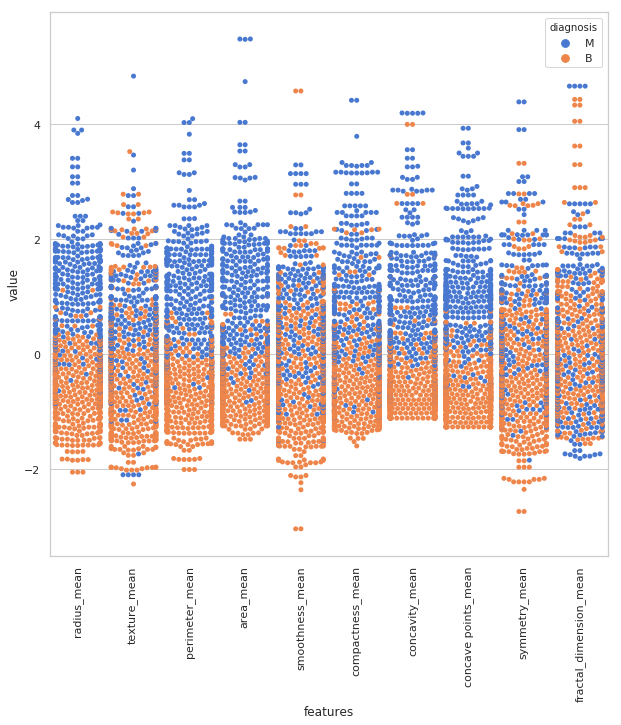

In [175]:
data1 = nd
norm= (data1 - data1.mean()) / (data1.std())
sns.set(style="whitegrid", palette="muted")
data1 = pd.concat([lab,norm[mean_cols]],axis=1) # concat data to form new
data1 = pd.melt(data1,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
import time
tic = time.time()
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data1) 
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

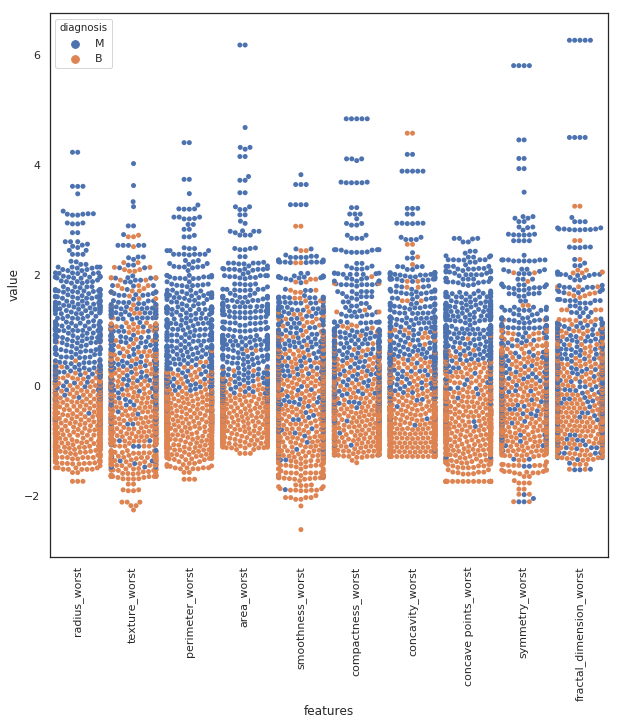

In [173]:
data1 = pd.concat([lab,norm[worst_cols]],axis=1)
data1 = pd.melt(data1,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data1)
toc = time.time()
plt.xticks(rotation=90)

Above swarm plots does show distribution of benign and malignant cells however characterstic like fractal dimension seems mixed up.

Not a lucid classifications.

Lets try with box plot.


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

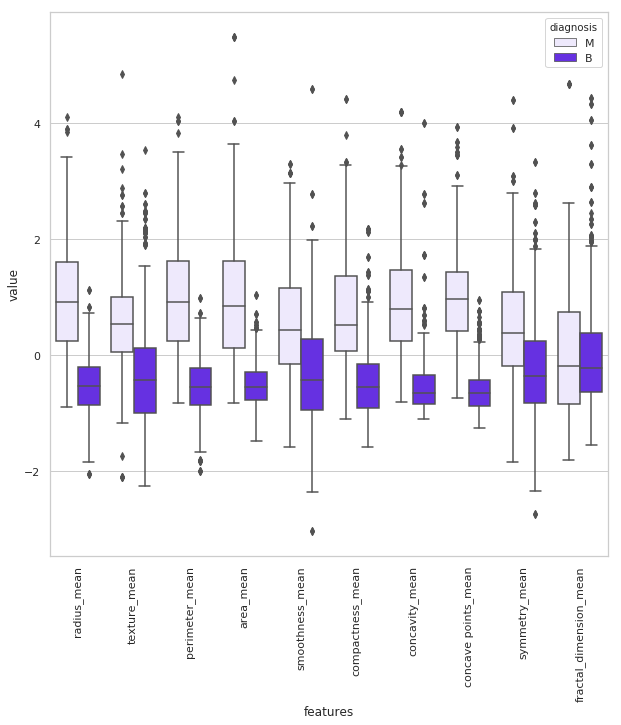

In [176]:

data1 = pd.concat([lab,norm[mean_cols]],axis=1)
data1 = pd.melt(data1,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.boxplot(x="features", y="value", hue="diagnosis", data=data1,color="#5a14fe")
plt.xticks(rotation=90)

In texture_mean, perimeter_mean, concave_points_mean and symetry_mean features, median of the Malignant and Benign looks like separated so it can be good for classification. However, in area_mean feature, median of the Malignant and Benign does not looks like separated so it does not gives good information for classification.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

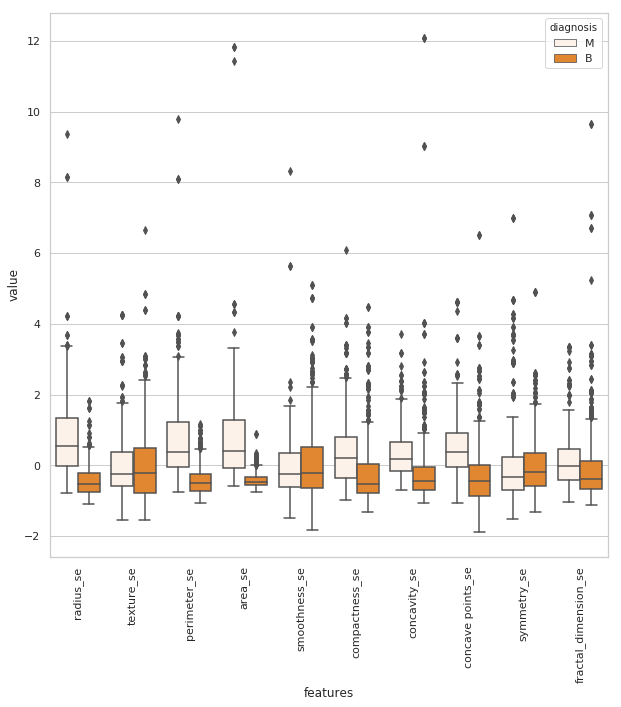

In [161]:
data1 = pd.concat([lab,norm[se_cols]],axis=1)
data1 = pd.melt(data1,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.boxplot(x="features", y="value", hue="diagnosis", data=data1,color="#fe8514")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

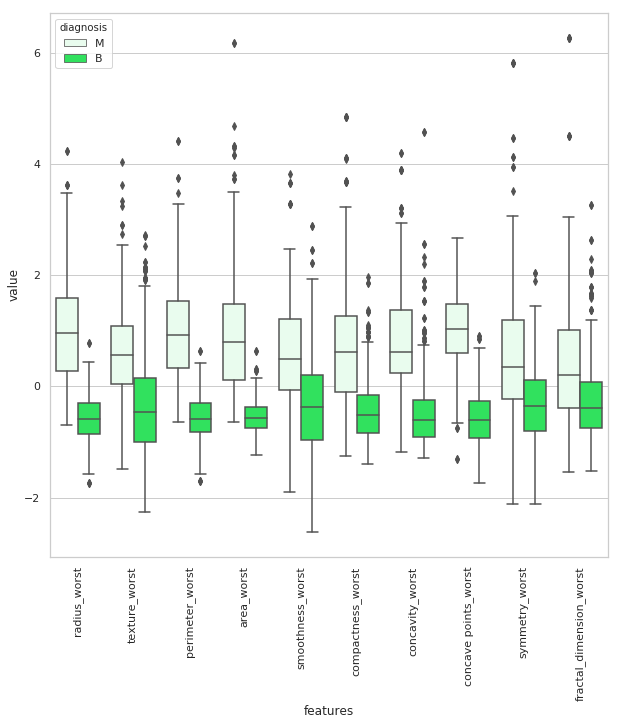

In [160]:
data1 = pd.concat([lab,norm[worst_cols]],axis=1)
data1 = pd.melt(data1,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.boxplot(x="features", y="value", hue="diagnosis", data=data1,color="#14fe4f")
plt.xticks(rotation=90)

In order to compare two features deeper, lets use joint plot. In the joint plot below, it is really correlated. Pearsonr value is correlation value and 1 is the highest. Therefore, 0.82 is looks enough to say that they are correlated.

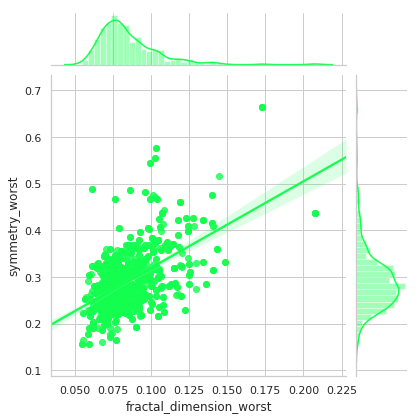

In [178]:
sns.jointplot(nd.loc[:,'fractal_dimension_worst'], nd.loc[:,'symmetry_worst'], kind="regg", color="#14fe4f")

In last violin plot, concavity_worst, concave_points_worst, and radius_worst also looks similar.  Let's plot the pair grid plot to see if they are correlated.

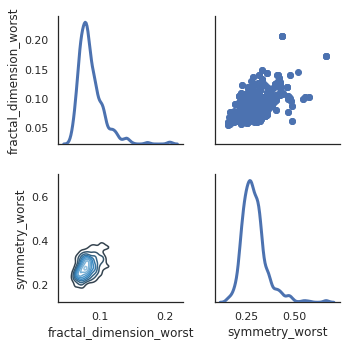

In [179]:
sns.set(style="white")
df = nd.loc[:,['fractal_dimension_worst','symmetry_worst']]
g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)


So, here we can see the degree of corelation between 'fractal_dimension_worst' and 'symmetry_worst'.
Drwaing correlation among all characterstics and try to formalize a predictive model.


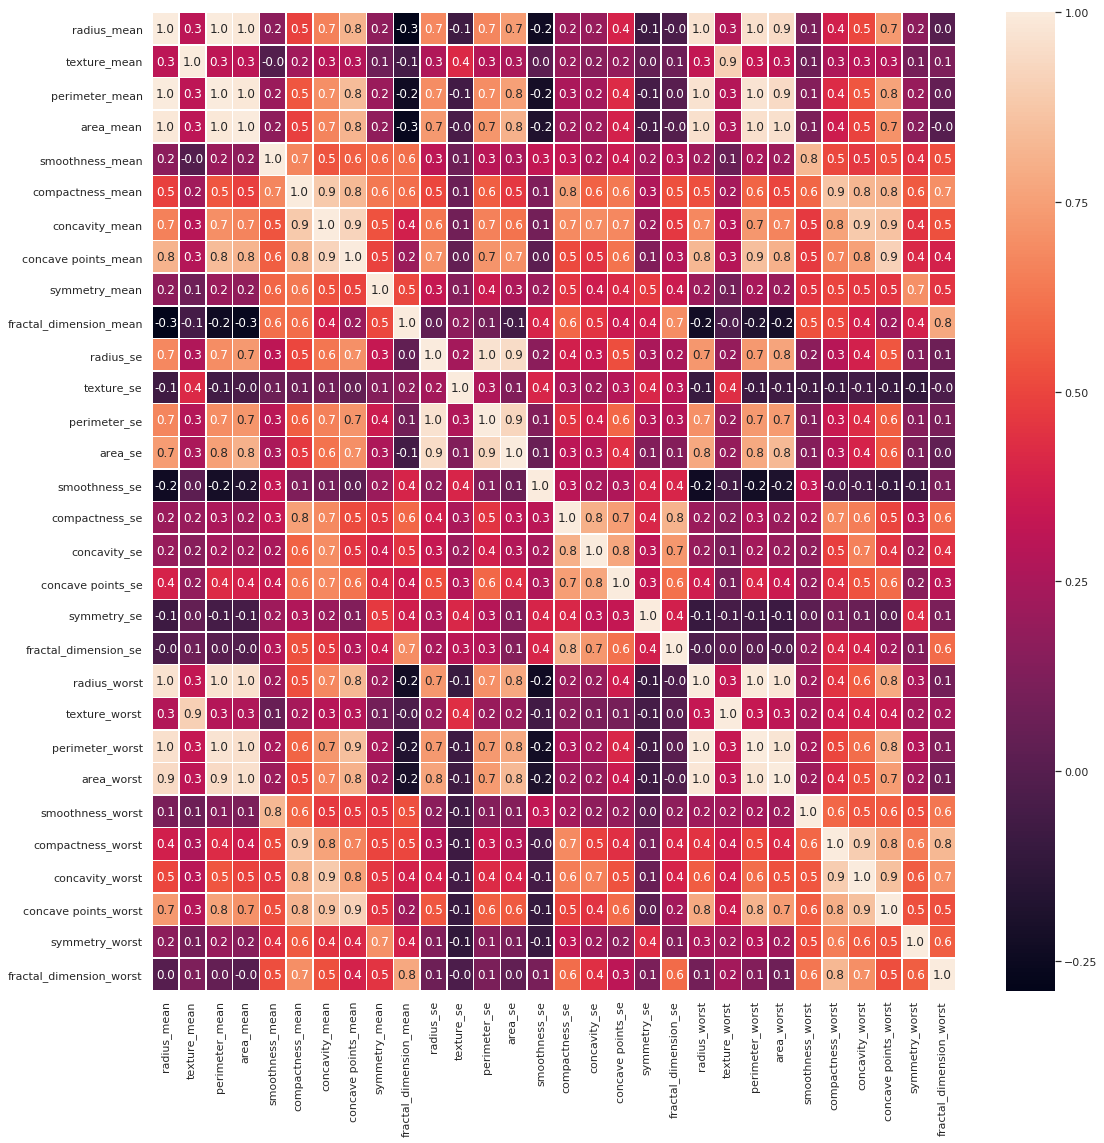

In [164]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(nd.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, color="#4ffe14")

Correlation matrix via plots grouped by Mean, Std error and Worst.

<h5>1. Grouped by mean</h5>

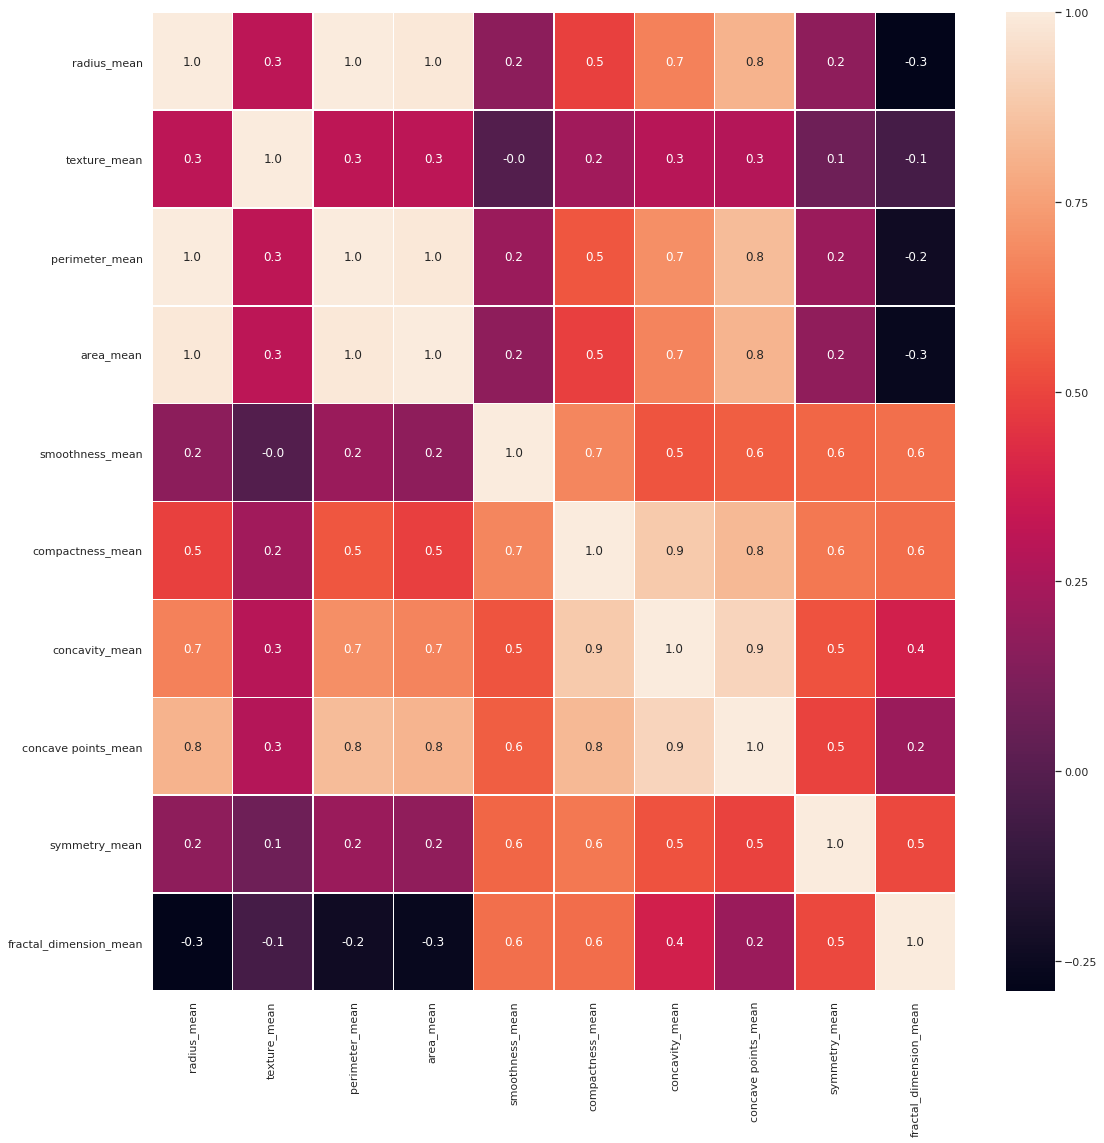

In [117]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(nd[mean_cols].corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, color="#4ffe14")

<h5>2. Grouped by standard error</h5>

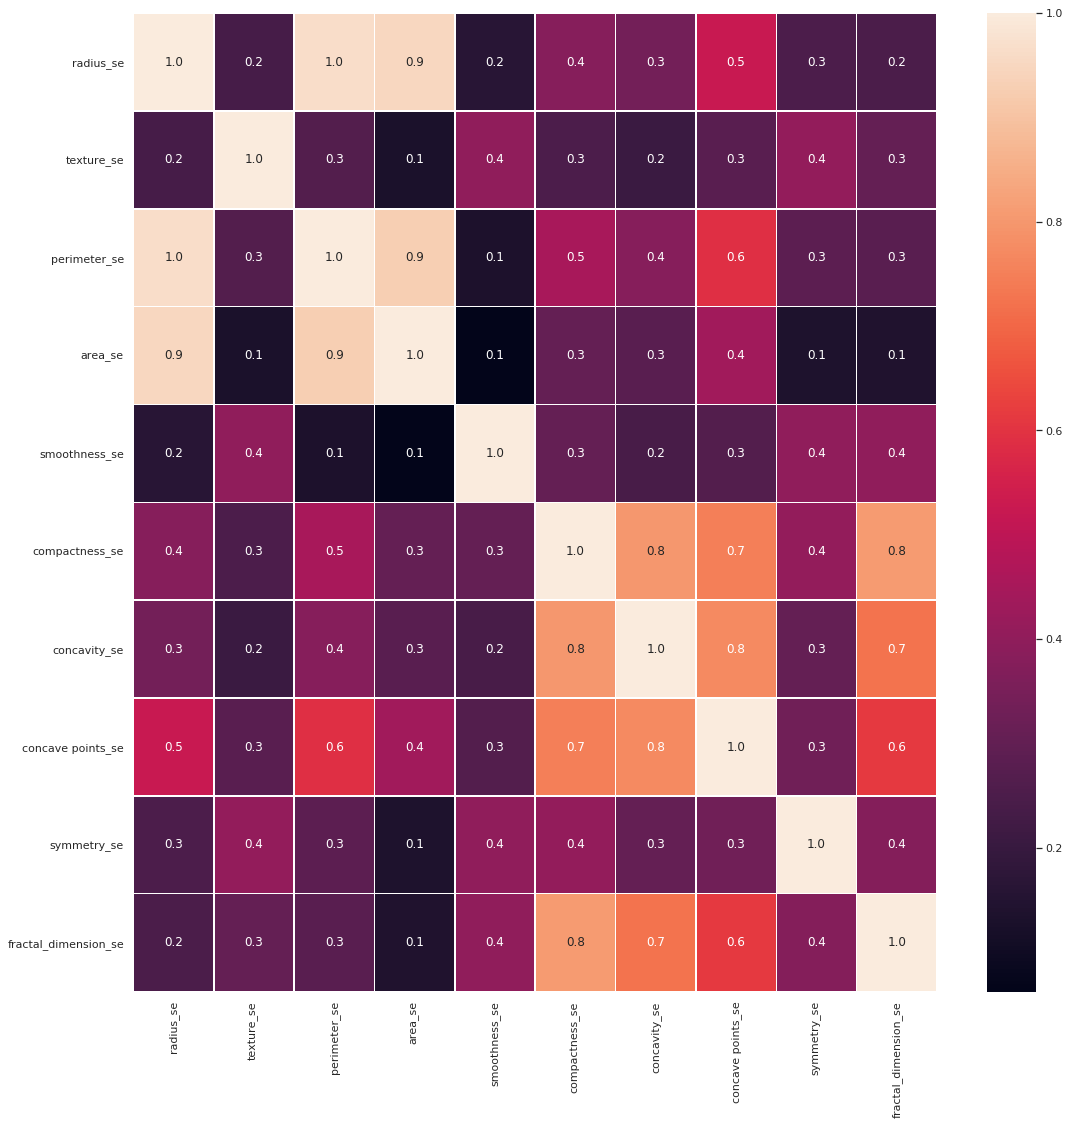

In [165]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(nd[se_cols].corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

<h5>3. Grouped by worst</h5>

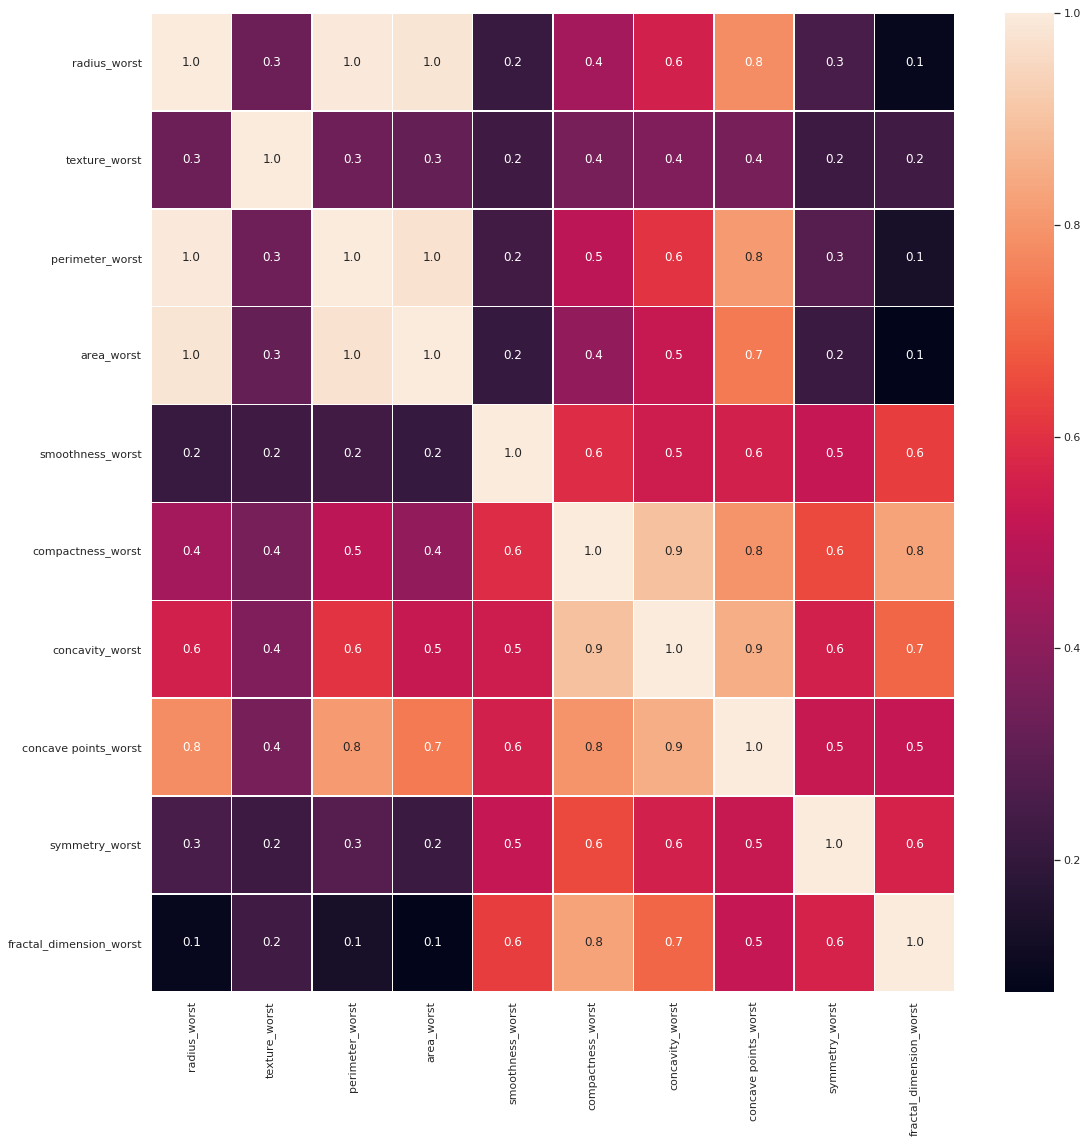

In [166]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(nd[worst_cols].corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

<h1>Feature Selection</h1>

Lets go for feature selection :-


In [168]:
nd1 = nd.drop(['radius_mean', 'radius_worst', 'texture_mean', 'concavity_worst','texture_worst', 'symmetry_worst'],axis = 1 )        # do not modify x, we will use it later 
nd1.head()

,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,...,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concave points_worst,fractal_dimension_worst
0,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,...,0.05373,0.01587,0.03003,0.006193,184.60,2019.0,0.1622,0.6656,0.2654,0.11890
1,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,...,0.01860,0.01340,0.01389,0.003532,158.80,1956.0,0.1238,0.1866,0.1860,0.08902
2,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,...,0.03832,0.02058,0.02250,0.004571,152.50,1709.0,0.1444,0.4245,0.2430,0.08758
3,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,...,0.05661,0.01867,0.05963,0.009208,98.87,567.7,0.2098,0.8663,0.2575,0.17300
4,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,...,0.05688,0.01885,0.01756,0.005115,152.20,1575.0,0.1374,0.2050,0.1625,0.07678


<h4>Lets perform feature selection using random forest classification.</h4>


Random Forsest Accuracy is Training Data:  0.9975


/opt/ibm/conda/miniconda36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


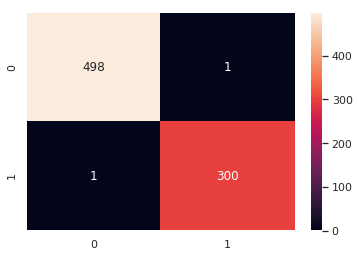

In [125]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

x_train, x_test, y_train, y_test = train_test_split(nd1, lab, test_size=0.3, random_state=42)
clf_rf = RandomForestClassifier(random_state=43)      
clr_rf = clf_rf.fit(x_train,y_train)
ac = accuracy_score(y_train,clf_rf.predict(x_train))
print('Random Forsest Accuracy is Training Data: ',ac)
cm = confusion_matrix(y_train,clf_rf.predict(x_train))
sns.heatmap(cm,annot=True,fmt="d")


Random Forsest Accuracy on Test Data:  0.9854651162790697


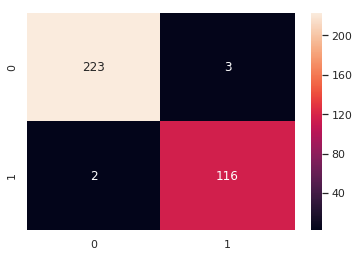

In [126]:
ac = accuracy_score(y_test,clf_rf.predict(x_test))
print('Random Forsest Accuracy on Test Data: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")


Training Data = 99.7%
Test Data = 98.5%

As we can see training to test gap is very low. However still if we'd like to plan for overfitting, say on a data set this gap had grown significatly - in that case we can utilize following :-


Cross-Validation : Cross Validation in its simplest form is a one round validation, where we leave one sample as in-time validation and rest for training the model. But for keeping lower variance a higher fold cross validation is preferred.

Early Stopping : Early stopping rules provide guidance as to how many iterations can be run before the learner begins to over-fit.

Pruning : Pruning is used extensively while building CART models. It simply removes the nodes which add little predictive power for the problem in hand.

Regularization : Regularization refers to a broad range of techniques for artificially forcing your model to be simpler. The method will depend on the type of learner you’re using. For example, you could prune a decision tree, use dropout on a neural network, or add a penalty parameter to the cost function in regression. Oftentimes, the regularization method is a hyperparameter as well, which means it can be tuned through cross-validation. 




<h4>Lets further test these features with SVM classifier.</h4>

SVM Accuracy is:  0.8895348837209303


/opt/ibm/conda/miniconda36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


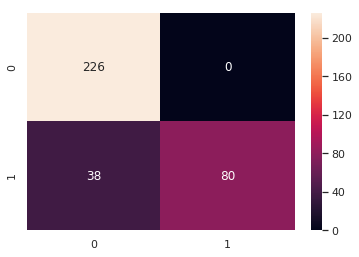

In [181]:
from sklearn import svm 
from sklearn import metrics

model = svm.SVC()
model.fit(x_train,y_train)

ac = accuracy_score(y_test,model.predict(x_test))
print('SVM Accuracy is: ',ac)
cm = confusion_matrix(y_test,model.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

Resultant Accuracy = 88.9%, not in line with Random Forest model outcome.


<h3>2. Univariate Feature Selection</h3>

In univariate feature selection, we will use SelectKBest that removes all but the k highest scoring features.

In [182]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
x_train, x_test, y_train, y_test = train_test_split(nd, lab, test_size=0.3, random_state=42)
select_feature = SelectKBest(chi2, k=5).fit(x_train, y_train)
print('Score list:', select_feature.scores_)
print('Feature list:', x_train.columns)


Score list: [3.48165666e+02 1.26528712e+02 2.64235251e+03 6.99150267e+04
 2.45885452e-01 7.44033191e+00 2.65323679e+01 1.45179030e+01
 4.16002261e-01 1.32629037e-04 4.79386866e+01 1.13630603e-01
 3.44322389e+02 1.16560021e+04 7.61182473e-03 7.04145542e-01
 1.04364428e+00 4.12974010e-01 2.14931131e-04 7.36765439e-03
 6.54766192e+02 2.37201100e+02 4.86691100e+03 1.47959584e+05
 6.21334281e-01 2.69717363e+01 5.31957977e+01 1.86991972e+01
 1.92274366e+00 3.84554549e-01]
Feature list: Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'c

The Top scored features are <b>fractal_dimension_mean, concave_points_worst, perimeter_sd_error, compactness_sd_error, and smoothness_sd_error</b>. 
'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean'
Let's build model on top of these 5 features.

<h4>Lets classify using Random Forest Classification.</h4>

Random Forsest Accuracy is:  0.9883720930232558


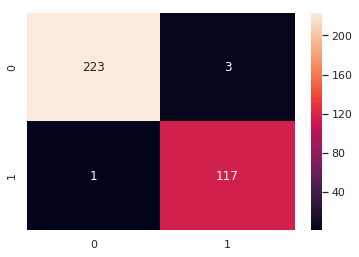

In [129]:
x_train_2 = select_feature.transform(x_train)
x_test_2 = select_feature.transform(x_test)
clf_rf_2 = RandomForestClassifier(n_estimators=100)      
clr_rf_2 = clf_rf_2.fit(x_train_2,y_train)
ac_2 = accuracy_score(y_test,clf_rf_2.predict(x_test_2))
print('Random Forsest Accuracy is: ',ac_2)
cm_2 = confusion_matrix(y_test,clf_rf_2.predict(x_test_2))
sns.heatmap(cm_2,annot=True,fmt="d")

Here accuracy is 98.8% so pretty much on prediction line. 


<h4>Lets further test these features with SVM classifier.</h4>

Support Vector Machine Accuracy is:  0.9622093023255814


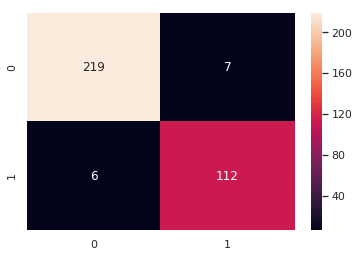

In [184]:
model = svm.SVC(kernel = 'linear',C=.1, gamma=10, probability = True)
model.fit(x_train,y_train)

ac = accuracy_score(y_test,model.predict(x_test))
print('Support Vector Machine Accuracy is: ',ac)
cm = confusion_matrix(y_test,model.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

So now, SVM Accuracy is 96.4%,

<h2> Summary </h2>

Our data was fairly distributed. We've dropped following varibales - 'radius_mean', 'radius_worst', 'texture_mean', 'concavity_worst','texture_worst', 'symmetry_worst' - as they were corelated. With that we were left with 80% of original characterstics.

Among two models - both for feature and classification techniques - Random Forest worked best with SelectKBest feature selection. 


In random forest, we can see it from its name, which is to create a forest by some way and make it random. There is a direct relationship between the number of trees in the forest and the results it can get: the larger the number of trees, the more accurate the result. 
The difference between Random Forest algorithm and the decision tree algorithm is that <b>in Random Forest, the process of finding the root node and splitting the feature nodes will run randomly</b>.

The data is divided into training(70%) and testing(30%) and Random forest model scored well with the testing dataset.

Primary factors cleading to identificaton of malignant vs benign cancer cell :-

        1. fractal_dimension_worst
        2. concave_points_worst
        3. perimeter_sd_error
        4. compactness_sd_error
        5. smoothness_sd_error

Random forest has achieved <b>99.7%</b> accuracy comapared to other models like SVM.

